In [ ]:
import pandas as _hex_pandas
import datetime as _hex_datetime
import json as _hex_json

In [ ]:
hex_scheduled = _hex_json.loads("false")

In [ ]:
hex_user_email = _hex_json.loads("\"example-user@example.com\"")

In [ ]:
hex_run_context = _hex_json.loads("\"logic\"")

In [ ]:
hex_timezone = _hex_json.loads("\"US/Eastern\"")

In [ ]:
hex_project_id = _hex_json.loads("\"52ffd34b-494b-43c4-a1b2-0c7bd9ae09a2\"")

In [ ]:
hex_project_name = _hex_json.loads("\"FinalProjectP1\"")

In [ ]:
hex_status = _hex_json.loads("\"\"")

In [ ]:
hex_categories = _hex_json.loads("[]")

In [ ]:
hex_color_palette = _hex_json.loads("[\"#4C78A8\",\"#F58518\",\"#E45756\",\"#72B7B2\",\"#54A24B\",\"#EECA3B\",\"#B279A2\",\"#FF9DA6\",\"#9D755D\",\"#BAB0AC\"]")

In [ ]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import numpy as np
import geopandas
import scipy.stats as st
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
    

In [ ]:
import pandas as pd

file_names = [
    '2011_Incident.csv',
    '2012_Incident.csv',
    '2013_Incident.csv',
    '2014_Incident.csv',
    '2015_Incident.csv',
    '2016_Incident.csv'
]

dataframes = []

for file in file_names:
    df = pd.read_csv(file)
    dataframes.append(df)

merged_df = pd.concat(dataframes)


/tmp/ipykernel_12/896695806.py:19: DtypeWarning:

Columns (17,28,29) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
print(merged_df.columns)
print(merged_df.info())



Index(['Complaint_No', 'Block_No', 'Direction', 'Street_Name', 'Street_Type',
       'Suffix', 'Apt_No', 'City', 'State', 'Zipcode', 'X_Coordinate',
       'Y_Coordinate', 'Division', 'Reported_Date', 'Location_Desc',
       'Location_Type', 'Incident_From_Date', 'Incident_to_date', 'Place1',
       'Place2', 'Clearance_Status', 'Clearance_Date', 'Case_Status',
       'Reporting_Agency', 'Follow_up_Section', 'NIBRS_Hi_Class',
       ' Incident_From_Time', 'Incident_to_Time', 'Unnamed: 28',
       'Unnamed: 29'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 566789 entries, 0 to 99856
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Complaint_No         566789 non-null  int64  
 1   Block_No             566789 non-null  object 
 2   Direction            566789 non-null  object 
 3   Street_Name          566789 non-null  object 
 4   Street_Type          566788 non-null  o

In [ ]:
merged_df.to_csv('merged_data.csv', index=False)


In [ ]:

merged_df.columns = merged_df.columns.str.strip()

columns_to_remove = [
    'Block_No', 'Direction', 'Suffix', 'Apt_No', 'Division',
    'Reported_Date', 'Location_Desc', 'Location_Type', 'Incident_to_date',
    'Place2', 'Clearance_Status', 'Clearance_Date', 'Case_Status',
    'Reporting_Agency', 'Follow_up_Section', 'Incident_From_Time',
    'Incident_to_Time', 'Unnamed: 28', 'Unnamed: 29'
]

merged_df = merged_df.drop(columns=columns_to_remove)

merged_df.to_csv('updated_merged_data.csv', index=False)


In [ ]:
for col in merged_df.select_dtypes(include=['object']): # 'object' type usually means strings in a DataFrame
    merged_df[col] = merged_df[col].str.strip()



merged_df = merged_df[merged_df['Zipcode'].str.strip() != '']


merged_df.fillna(0, inplace=True)
merged_df['X_Coordinate'].replace(to_replace=[None, ''], value=0, inplace=True)
merged_df['Y_Coordinate'].replace(to_replace=[None, ''], value=0, inplace=True)
merged_df.to_csv('cleaned_merged_data.csv', index=False)

In [ ]:
merged_df.rename(columns={'NIBRS_Hi_Class': 'Crime_Type'}, inplace=True)
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428401 entries, 0 to 99856
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Complaint_No        428401 non-null  int64 
 1   Street_Name         428401 non-null  object
 2   Street_Type         428401 non-null  object
 3   City                428401 non-null  object
 4   State               428401 non-null  object
 5   Zipcode             428401 non-null  object
 6   X_Coordinate        428401 non-null  object
 7   Y_Coordinate        428401 non-null  object
 8   Incident_From_Date  428401 non-null  object
 9   Place1              428401 non-null  object
 10  Crime_Type          428401 non-null  object
dtypes: int64(1), object(10)
memory usage: 39.2+ MB
None


In [ ]:
unique_crime_types = merged_df['Crime_Type'].unique()

print(unique_crime_types)


['Drug Equipment Violations' 'Aggravated Assault' 'Burglary/B&E' 'Affray'
 'All Other Offenses' 'Simple Assault' 'Missing Person'
 'Damage/Vandalism Of Property' 'Drug/Narcotic Violations'
 'Driving Under The Influence' 'Trespass Of Real Property'
 'Disorderly Conduct' 'Theft From Motor Vehicle'
 'Hit And Run (Property Only)' 'Suicide' 'Intimidation'
 'Motor Vehicle Theft' 'Shoplifting'
 'Theft of Motor Vehicle Parts from Vehicle' 'Other Unlisted Non-Criminal'
 'False Pretenses/Swindle' 'All Other Thefts' 'Theft From Building'
 'Counterfeiting/Forgery' 'Robbery' 'Forcible Rape' 'Vehicle Recovery'
 'Kidnapping' 'Weapon Law Violations' 'Purse-Snatching'
 'Sudden/Natural Death Investigation' 'Embezzlement'
 'Credit Card/Teller Fraud' 'Family Offenses; Nonviolent'
 'Stolen Property Offenses' 'Impersonation'
 'Theft From Coin-Operated Machine Or Device' 'Statutory Rape'
 'Forcible Fondling' 'Wire Fraud' 'Dog Bite/Animal Control Incident'
 'Overdose' 'Pocket-Picking' 'Pornography/Obscene Mat

In [ ]:
unique_crime_types = merged_df['Crime_Type'].unique()

print(unique_crime_types)


['Drug Equipment Violations' 'Aggravated Assault' 'Burglary/B&E' 'Affray'
 'All Other Offenses' 'Simple Assault' 'Missing Person'
 'Damage/Vandalism Of Property' 'Drug/Narcotic Violations'
 'Driving Under The Influence' 'Trespass Of Real Property'
 'Disorderly Conduct' 'Theft From Motor Vehicle'
 'Hit And Run (Property Only)' 'Suicide' 'Intimidation'
 'Motor Vehicle Theft' 'Shoplifting'
 'Theft of Motor Vehicle Parts from Vehicle' 'Other Unlisted Non-Criminal'
 'False Pretenses/Swindle' 'All Other Thefts' 'Theft From Building'
 'Counterfeiting/Forgery' 'Robbery' 'Forcible Rape' 'Vehicle Recovery'
 'Kidnapping' 'Weapon Law Violations' 'Purse-Snatching'
 'Sudden/Natural Death Investigation' 'Embezzlement'
 'Credit Card/Teller Fraud' 'Family Offenses; Nonviolent'
 'Stolen Property Offenses' 'Impersonation'
 'Theft From Coin-Operated Machine Or Device' 'Statutory Rape'
 'Forcible Fondling' 'Wire Fraud' 'Dog Bite/Animal Control Incident'
 'Overdose' 'Pocket-Picking' 'Pornography/Obscene Mat

In [ ]:
crime_types_to_keep = [
    'Burglary/B&E', 'Damage/Vandalism Of Property', 'Theft From Motor Vehicle',
    'Hit And Run (Property Only)', 'Motor Vehicle Theft', 'Shoplifting',
    'Theft of Motor Vehicle Parts from Vehicle', 'False Pretenses/Swindle',
    'Theft From Building', 'Counterfeiting/Forgery', 'Robbery', 'Embezzlement',
    'Credit Card/Teller Fraud', 'Stolen Property Offenses', 
    'Theft From Coin-Operated Machine Or Device', 'Pocket-Picking', 'Arson',
    'Worthless Check: Felony (over $2000)', 'Extortion/Blackmail'
]

filtered_df = merged_df[merged_df['Crime_Type'].isin(crime_types_to_keep)]

print(filtered_df.head())

filtered_df.to_csv('filtered_crime_data.csv', index=False)
print(filtered_df.info())


      Complaint_No    Street_Name Street_Type       City State Zipcode  \
3   20110101001302    QUAIL GLENN          CT  CHARLOTTE    NC   28226   
13  20110101010102    HUNTER OAKS          LN  CHARLOTTE    NC   28213   
18  20110101010901       WILDWOOD          AV  CHARLOTTE    NC   28208   
23  20110101011801  CAROLINA ROSE          TR  CHARLOTTE    NC   28215   
35  20110101021406         BROWNS          AV  CHARLOTTE    NC   28208   

   X_Coordinate Y_Coordinate Incident_From_Date       Place1  \
3       1453488       502939           12/31/10  Residential   
13      1467882       561570             1/1/11  Residential   
18      1434449       556877             1/1/10  Residential   
23      1469089       548998           12/31/10  Residential   
35      1431783       551738           12/31/10  Residential   

                      Crime_Type  
3                   Burglary/B&E  
13  Damage/Vandalism Of Property  
18                  Burglary/B&E  
23                  Burglary/B

In [ ]:
census_zip = pd.read_csv("census_zip.csv")
print(census_zip)


    Zipcode     city_name        GEOID  Census_Tract  Shape__Area  \
0     28269     CHARLOTTE  37119005515         55.15     24126080   
1     28075    HARRISBURG  37119005521         55.21    100686207   
2     28208     CHARLOTTE  37119004303         43.03     45952486   
3     28214     CHARLOTTE  37119006006         60.06    112820681   
4     28120   MOUNT HOLLY  37119006007         60.07    118582887   
5     28120   MOUNT HOLLY  37119006007         60.07    118582887   
6     28206     CHARLOTTE  37119004900         49.00      9489828   
7     28205     CHARLOTTE  37119001509         15.09     38963738   
8     28202     CHARLOTTE  37119004900         49.00      9489828   
9     28203     CHARLOTTE  37119002702         27.02     36756099   
10    28211     CHARLOTTE  37119002004         20.04     50369032   
11    28227     CHARLOTTE  37119001915         19.15     31470721   
12    28104      MATTHEWS  37119005823         58.23    128528327   
13    28104      MATTHEWS  3711900

In [ ]:
filtered_df = pd.read_csv('filtered_crime_data.csv')

census_zip = pd.read_csv("census_zip.csv")

filtered_df['Zipcode'] = filtered_df['Zipcode'].astype(str)
census_zip['Zipcode'] = census_zip['Zipcode'].astype(str)

merged_dataset = pd.merge(filtered_df, census_zip, on='Zipcode', how='inner')


merged_dataset.to_csv('CensusAndCrime.csv', index=False)

print(merged_dataset.head())


     Complaint_No         Street_Name Street_Type       City State Zipcode  \
0  20110101001302         QUAIL GLENN          CT  CHARLOTTE    NC   28226   
1  20110101094601    WATERFORD SQUARE          DR  CHARLOTTE    NC   28226   
2  20110105140603         POPPY HILLS          LN  CHARLOTTE    NC   28226   
3  20110105163502  PINEVILLE-MATTHEWS          RD  CHARLOTTE    NC   28226   
4  20110106134504              CARMEL          RD  CHARLOTTE    NC   28226   

   X_Coordinate  Y_Coordinate Incident_From_Date            Place1  \
0       1453488        502939           12/31/10       Residential   
1       1448249        493716           12/31/10       Residential   
2       1449521        490255             1/3/11       Residential   
3       1466900        494901             8/4/10  Commercial Place   
4       1454434        502566             1/6/11            Retail   

                    Crime_Type  city_name        GEOID  Census_Tract  \
0                 Burglary/B&E  CHARLO

In [ ]:
SocioFactors = pd.read_csv('FINALDAFFY.csv')
SocioFactors = pd.read_csv('FINALDAFFY.csv')

SocioFactors.rename(columns={'Census Tract Number': 'Census_Tract'}, inplace=True)


SocioFactors.to_csv('FINALDAFFY.csv', index=False)

print(SocioFactors.head())


        GEO_ID  Census_Tract  HS1  HS2  HS3  HS4  HS5  HSsum  SCAD1  SCAD2  \
0  37119000100           1.0    3    4  100   93   88    288     23     14   
1  37119000100           1.0    3    4  100   93   88    288     23     14   
2  37119000100           1.0    3    4  100   93   88    288     23     14   
3  37119000100           1.0    3    4  100   93   88    288     23     14   
4  37119000100           1.0    3    4  100   93   88    288     23     14   

   ...  0.1  0.2  0.3     0.4  0.5  0.6  0.7  0.8  0.9  0.10  
0  ...    0    0    0  288400  425  335   81  316  935   156  
1  ...    0    0    0  389600  425  335   81  316  935   156  
2  ...    0    0    0  356100  425  335   81  316  935   156  
3  ...    0    0    0  269100  425  335   81  316  935   156  
4  ...    0    0    0  287900  425  335   81  316  935   156  

[5 rows x 48 columns]


In [ ]:
SocioFactors = pd.read_csv('FINALDAFFY.csv')

final_merged_dataset = pd.merge(merged_dataset, SocioFactors, on='Census_Tract', how='inner')
final_merged_dataset.to_csv('Merged.csv', index=False)
final_merged_dataset_no_duplicates = final_merged_dataset.drop_duplicates(subset='Complaint_No', keep='first')

print(final_merged_dataset_no_duplicates.head())

final_merged_dataset_no_duplicates.to_csv('final_merged_data_no_duplicates.csv', index=False)

print(final_merged_dataset_no_duplicates.head())


      Complaint_No         Street_Name Street_Type       City State Zipcode  \
0   20110101001302         QUAIL GLENN          CT  CHARLOTTE    NC   28226   
6   20110101094601    WATERFORD SQUARE          DR  CHARLOTTE    NC   28226   
12  20110105140603         POPPY HILLS          LN  CHARLOTTE    NC   28226   
18  20110105163502  PINEVILLE-MATTHEWS          RD  CHARLOTTE    NC   28226   
24  20110106134504              CARMEL          RD  CHARLOTTE    NC   28226   

    X_Coordinate  Y_Coordinate Incident_From_Date            Place1  ... 0.1  \
0        1453488        502939           12/31/10       Residential  ...  28   
6        1448249        493716           12/31/10       Residential  ...  28   
12       1449521        490255             1/3/11       Residential  ...  28   
18       1466900        494901             8/4/10  Commercial Place  ...  28   
24       1454434        502566             1/6/11            Retail  ...  28   

   0.2  0.3     0.4  0.5  0.6  0.7  0.8  0.9

In [ ]:
print(list(final_merged_dataset_no_duplicates.columns))

final_merged_dataset_no_duplicates.columns = final_merged_dataset_no_duplicates.columns.str.strip()

columns_to_remove = [
    '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '0.10'
]

for column in final_merged_dataset_no_duplicates.columns:
    if column.strip() in columns_to_remove:
        final_merged_dataset_no_duplicates.drop(column, axis=1, inplace=True)

print(final_merged_dataset_no_duplicates.info())

['Complaint_No', 'Street_Name', 'Street_Type', 'City', 'State', 'Zipcode', 'X_Coordinate', 'Y_Coordinate', 'Incident_From_Date', 'Place1', 'Crime_Type', 'city_name', 'GEOID', 'Census_Tract', 'Shape__Area', 'Shape__Length', 'shape_Length', 'shape_Area', 'GEO_ID', 'HS1', 'HS2', 'HS3', 'HS4', 'HS5', 'HSsum', 'SCAD1', 'SCAD2', 'SCAD3', 'SCADsum', 'BDH1', 'BDH2', 'BDH3', 'BDH4', 'BDH5', 'BDH6', 'BDH7', 'BDHsum', 'Employed!!Estimate!!Population 16 years and over', 'Employed!!Estimate!!AGE!!16 to 19 years', 'Employed!!Estimate!!AGE!!20 to 24 years', 'Employed!!Estimate!!AGE!!25 to 44 years', 'Employed!!Estimate!!AGE!!55 to 64 years', 'Employed!!Estimate!!AGE!!65 to 74 years', 'Employed!!Estimate!!AGE!!75 years and over', 'Unemployment rate!!Estimate!!Population 16 years and over', 'Unemployment rate!!Estimate!!AGE!!16 to 19 years', 'Unemployment rate!!Estimate!!AGE!!20 to 24 years', 'Unemployment rate!!Estimate!!AGE!!25 to 44 years', 'Unemployment rate!!Estimate!!AGE!!55 to 64 years', 'Unempl

In [ ]:
if 'Complaint_No' in final_merged_dataset_no_duplicates.columns:
    final_merged_dataset_no_duplicates.rename(columns={'Complaint_No': 'Complaint_Number'}, inplace=True)

final_merged_dataset_no_duplicates.rename(columns={
    'HSsum': 'HighSchoolGraduates',
    'SCADsum': 'SomeCollege',
    'BDHsum': 'BachelorsDegreeOrHigher',
    # Add additional renames if necessary
}, inplace=True, errors='ignore')

columns_to_remove = ['GEOID', 'city_name', 'shape_Length', 'shape_Area']
final_merged_dataset_no_duplicates.drop(columns=columns_to_remove, inplace=True, errors='ignore')


if 'Complaint_Number' in final_merged_dataset_no_duplicates.columns:
    column_order = ['GEO_ID', 'Census_Tract', 'Complaint_Number'] + \
                   [col for col in final_merged_dataset_no_duplicates.columns if col not in ['GEO_ID', 'Census_Tract', 'Complaint_Number']]
    final_merged_dataset_no_duplicates = final_merged_dataset_no_duplicates[column_order]

if 'Crime_Type' in final_merged_dataset_no_duplicates.columns:
    final_merged_dataset_no_duplicates['Crime_Type'] = final_merged_dataset_no_duplicates.pop('Crime_Type')

final_merged_dataset_no_duplicates.to_csv('cleaned_and_reordered_data.csv', index=False)

print(final_merged_dataset_no_duplicates.head())


/tmp/ipykernel_12/1204403986.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_12/1204403986.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_12/1204403986.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

         GEO_ID  Census_Tract  Complaint_Number         Street_Name  \
0   37119002004         20.04    20110101001302         QUAIL GLENN   
6   37119002004         20.04    20110101094601    W

In [ ]:
cleaned_and_reordered_dataset = pd.read_csv('cleaned_and_reordered_data.csv')

column_renames = {
    'Employed!!Estimate!!Population 16 years and over': 'EmployedPopulationOver16',
    'Employed!!Estimate!!AGE!!16 to 19 years': 'EmployedAge16to19',
    'Employed!!Estimate!!AGE!!20 to 24 years': 'EmployedAge20to24',
    'Employed!!Estimate!!AGE!!25 to 44 years': 'EmployedAge25to44',
    'Employed!!Estimate!!AGE!!55 to 64 years': 'EmployedAge55to64',
    'Employed!!Estimate!!AGE!!65 to 74 years': 'EmployedAge65to74',
    'Employed!!Estimate!!AGE!!75 years and over': 'EmployedAge75AndOver',
    'Unemployment rate!!Estimate!!Population 16 years and over': 'UnemploymentRatePopulationOver16',
    'Unemployment rate!!Estimate!!AGE!!16 to 19 years': 'UnemploymentRateAge16to19',
    'Unemployment rate!!Estimate!!AGE!!20 to 24 years': 'UnemploymentRateAge20to24',
    'Unemployment rate!!Estimate!!AGE!!25 to 44 years': 'UnemploymentRateAge25to44',
    'Unemployment rate!!Estimate!!AGE!!55 to 64 years': 'UnemploymentRateAge55to64',
    'Unemployment rate!!Estimate!!AGE!!65 to 74 years': 'UnemploymentRateAge65to74',
    'Unemployment rate!!Estimate!!AGE!!75 years and over': 'UnemploymentRateAge75AndOver',
    'Estimate!!Total': 'TotalPopulationEstimate',
    'Estimate!!Total!!Owner occupied': 'HousingUnitsOwnerOccupied',
    'Estimate!!Total!!Renter occupied': 'HousingUnitsRenterOccupied'
}

cleaned_and_reordered_dataset.rename(columns=column_renames, inplace=True)

crime_type = cleaned_and_reordered_dataset.pop('Crime_Type')
cleaned_and_reordered_dataset['Crime_Type'] = crime_type

cleaned_and_reordered_dataset = cleaned_and_reordered_dataset.sort_values(by='Complaint_Number', ascending=False)

cleaned_and_reordered_dataset.to_csv('finalData.csv', index=False)

print(cleaned_and_reordered_dataset.head())


            GEO_ID  Census_Tract  Complaint_Number Street_Name Street_Type  \
67907  37119004303         43.03    20161231235500  INTERURBAN          AV   
67906  37119004303         43.03    20161231235000       CLYDE          DR   
32378  37119001509         15.09    20161231234901   MOSSCROFT          LN   
22312  37119001509         15.09    20161231234200       TRYON          ST   
86265  37119004900         49.00    20161231234101      CHURCH          ST   

            City State  Zipcode  X_Coordinate  Y_Coordinate  ...  \
67907  CHARLOTTE    NC    28208       1431587        554854  ...   
67906  CHARLOTTE    NC    28208       1441206        551129  ...   
32378  CHARLOTTE    NC    28215       1482291        554972  ...   
22312  CHARLOTTE    NC    28213       1474872        564567  ...   
86265  CHARLOTTE    NC    28202       1448960        542949  ...   

      UnemploymentRateAge16to19 UnemploymentRateAge20to24  \
67907                        52                         0   


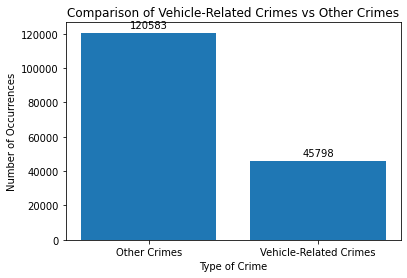

In [ ]:
vehicle_crimes = [
    'Theft From Motor Vehicle',
    'Motor Vehicle Theft',
    'Theft of Motor Vehicle Parts from Vehicle'
]

cleaned_and_reordered_dataset['Is_Vehicle_Crime'] = cleaned_and_reordered_dataset['Crime_Type'].apply(lambda x: 1 if x in vehicle_crimes else 0)

crime_counts = cleaned_and_reordered_dataset['Is_Vehicle_Crime'].value_counts()

labels = ['Other Crimes', 'Vehicle-Related Crimes']  # Reversed to match the order of crime_counts

fig, ax = plt.subplots()
bars = ax.bar(labels, crime_counts)

plt.title('Comparison of Vehicle-Related Crimes vs Other Crimes')
plt.xlabel('Type of Crime')
plt.ylabel('Number of Occurrences')

for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()


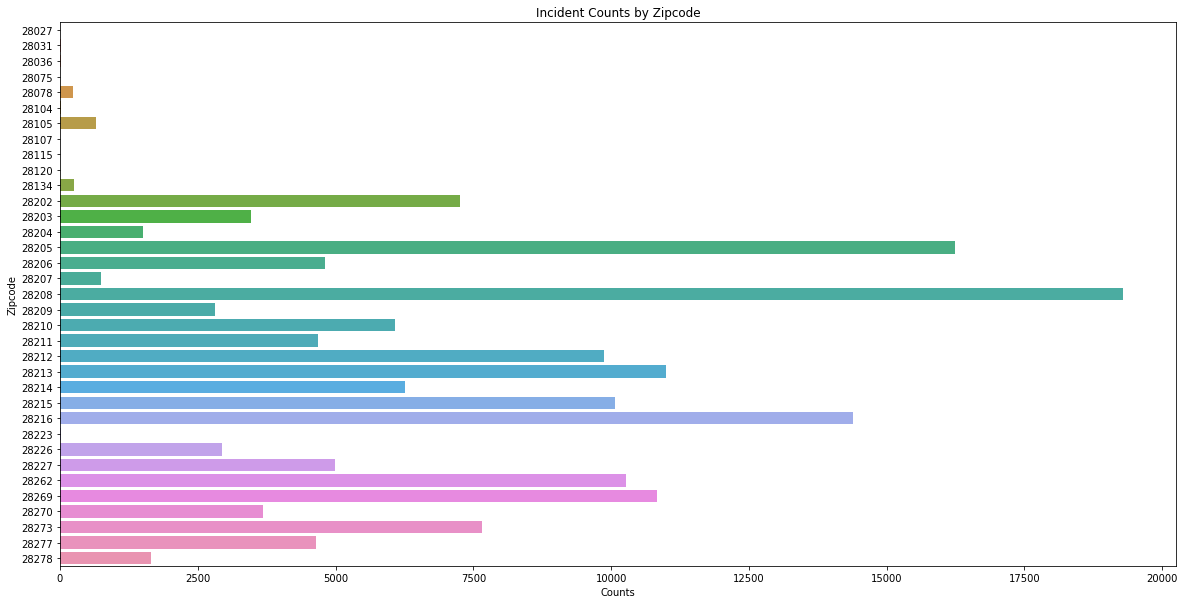

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
zip_counts = cleaned_and_reordered_dataset["Zipcode"].value_counts()
graph = sns.barplot(x=zip_counts.values, y=zip_counts.index, orient="h")
ax.set(xlabel='Counts', ylabel='Zipcode', title='Incident Counts by Zipcode')

plt.show()

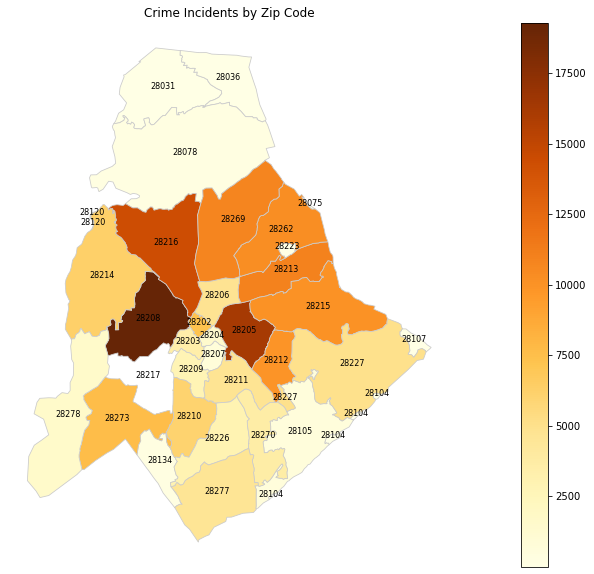

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

geo_final = pd.read_csv('finalData.csv')
Zip_Codes = gpd.read_file('Zip_Codes.zip')

zipcode_counts = geo_final['Zipcode'].value_counts().reset_index()
zipcode_counts.columns = ['Zipcode', 'Incident_Count']  # Correctly rename columns
Zip_Codes['ZIP'] = Zip_Codes['ZIP'].astype(str)
zipcode_counts['Zipcode'] = zipcode_counts['Zipcode'].astype(str)
merged_data = Zip_Codes.set_index('ZIP').join(zipcode_counts.set_index('Zipcode'))

fig, ax = plt.subplots(figsize=(25, 10))
merged_data.plot(column='Incident_Count', cmap='YlOrBr', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Crime Incidents by Zip Code')
ax.set_axis_off()

for idx, row in merged_data.iterrows():
    if row['geometry']:
        plt.annotate(idx, (row['geometry'].centroid.x, row['geometry'].centroid.y),
                     ha='center', fontsize=8, color='black')

plt.show()


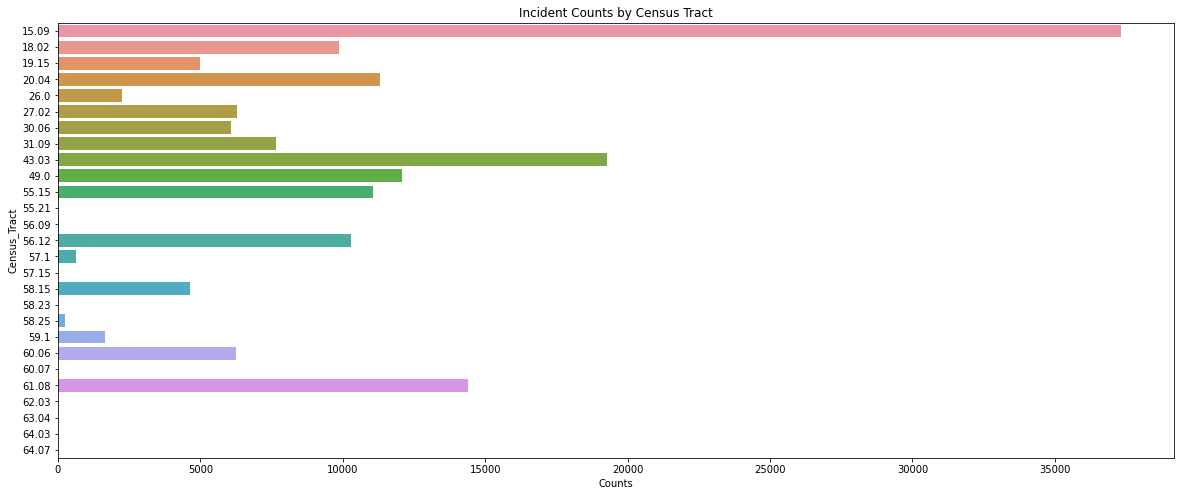

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))

zip_counts = cleaned_and_reordered_dataset["Census_Tract"].value_counts()
g = sns.barplot(x=zip_counts.values, y=zip_counts.index, orient="h")
ax.set(xlabel='Counts', ylabel='Census_Tract', title='Incident Counts by Census Tract')

plt.show()

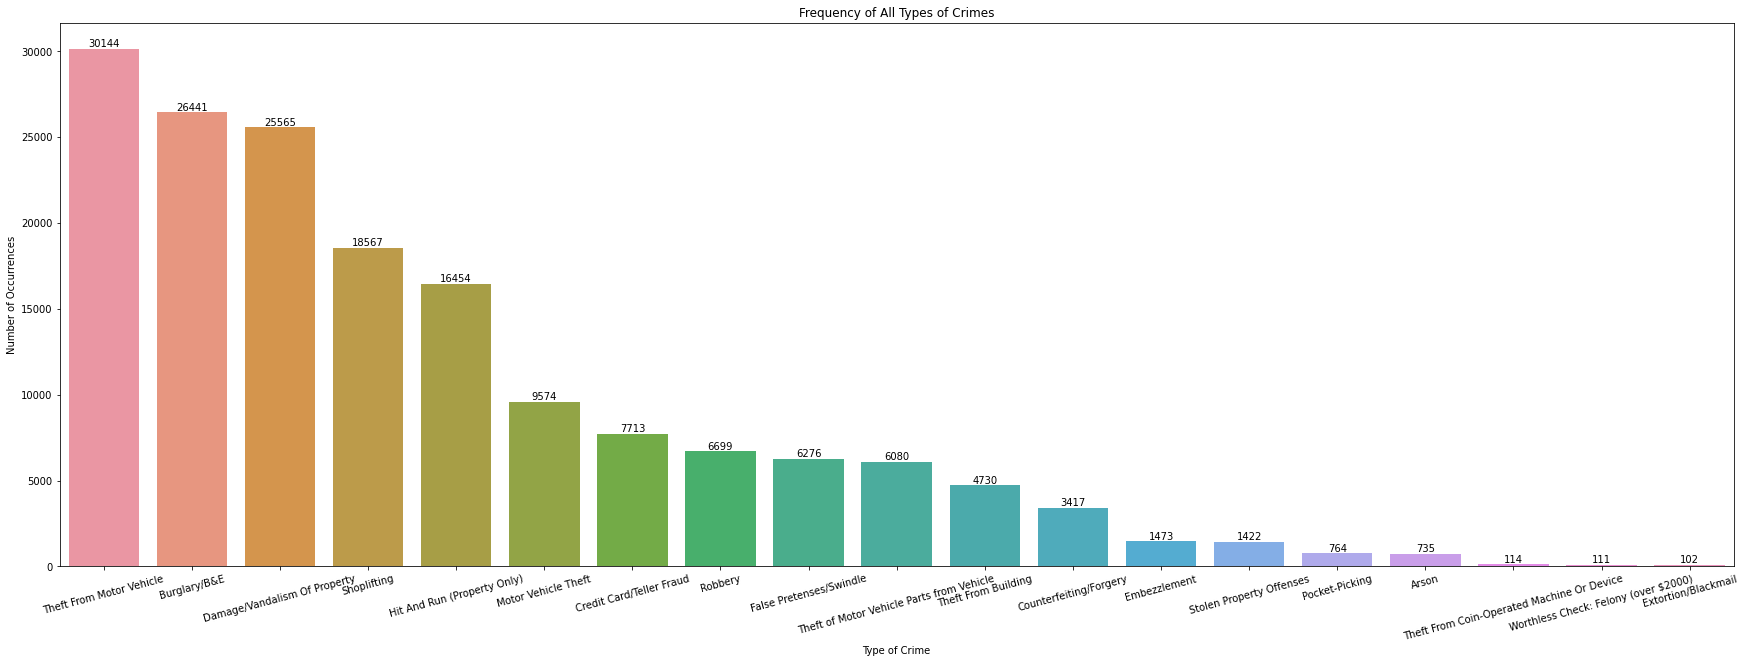

In [ ]:
crime_counts = cleaned_and_reordered_dataset['Crime_Type'].value_counts()

plt.figure(figsize=(30, 10))
sns.barplot(x=crime_counts.index, y=crime_counts.values)

for i, count in enumerate(crime_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.title('Frequency of All Types of Crimes')
plt.xlabel('Type of Crime')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=15)  # Rotate the x labels to make them more readable
plt.show()


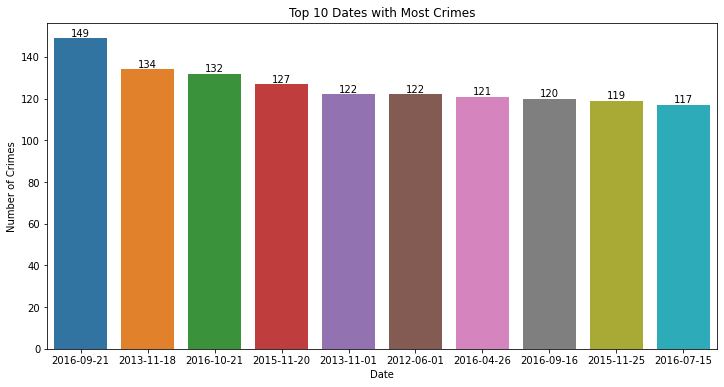

In [ ]:
cleaned_and_reordered_dataset['Incident_From_Date'] = pd.to_datetime(cleaned_and_reordered_dataset['Incident_From_Date'], errors='coerce')

crime_data = cleaned_and_reordered_dataset.dropna(subset=['Incident_From_Date'])

date_counts = cleaned_and_reordered_dataset['Incident_From_Date'].dt.date.value_counts()

top_dates = date_counts.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_dates.index.astype('str'), y=top_dates.values)
for i, count in enumerate(top_dates.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.title('Top 10 Dates with Most Crimes')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.show()


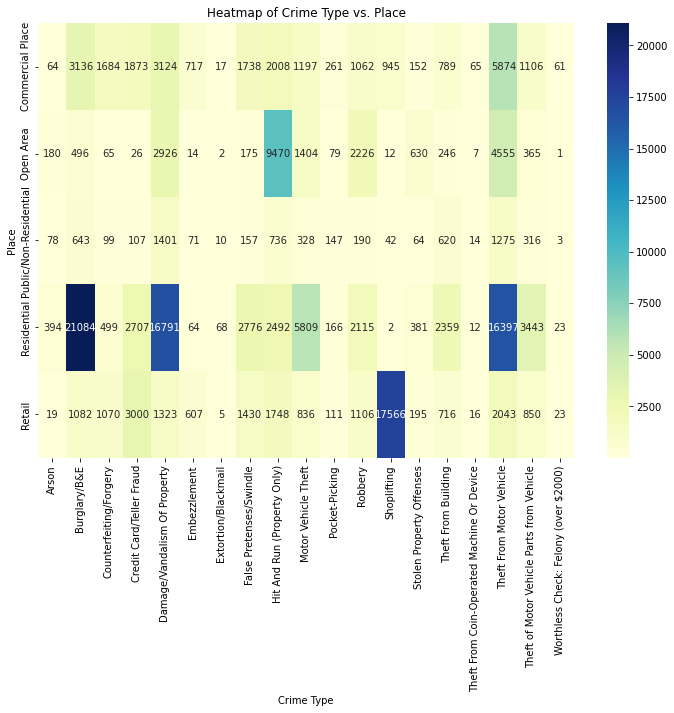

In [ ]:
ctab = pd.crosstab(cleaned_and_reordered_dataset['Place1'], cleaned_and_reordered_dataset['Crime_Type'])

plt.figure(figsize=(12, 8))
sns.heatmap(ctab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Crime Type vs. Place')
plt.ylabel('Place')
plt.xlabel('Crime Type')
plt.show()


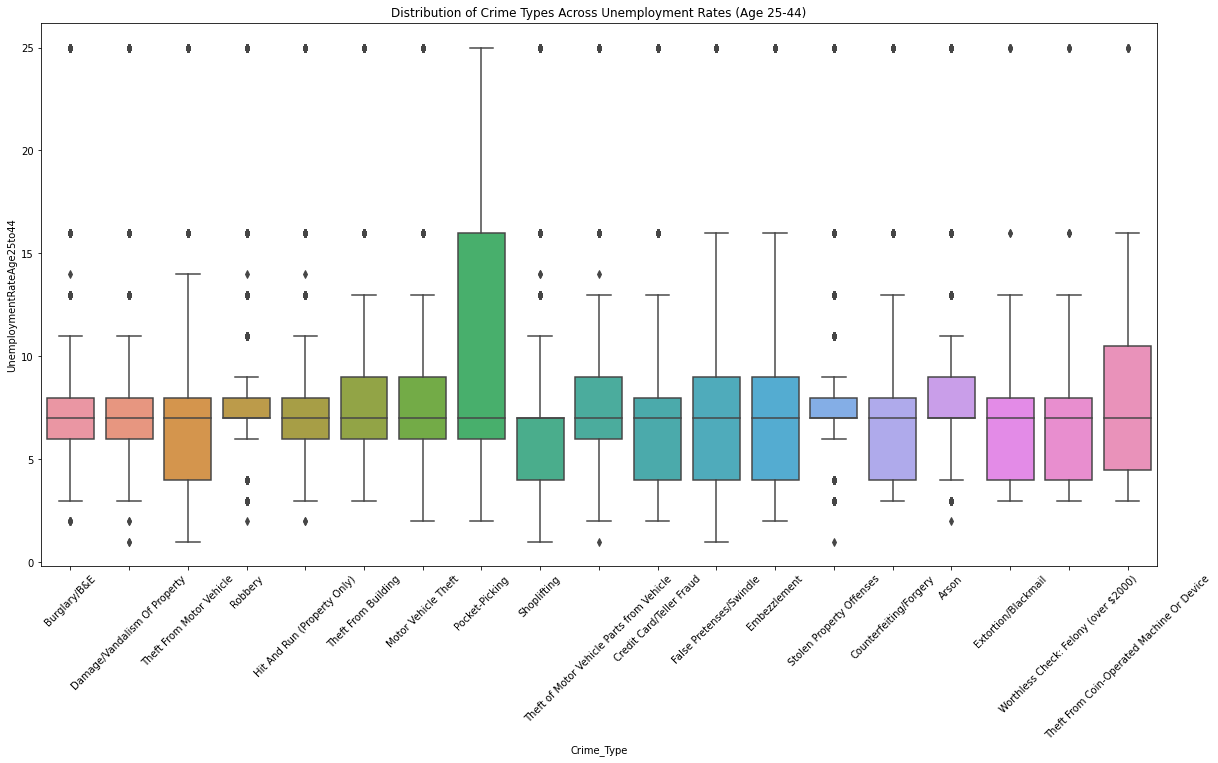

In [ ]:
plt.figure(figsize=(20, 10))  # Increase figure size
sns.boxplot(x='Crime_Type', y='UnemploymentRateAge25to44', data=cleaned_and_reordered_dataset)
plt.title("Distribution of Crime Types Across Unemployment Rates (Age 25-44)")
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.show()
